In [ ]:
# Loading Initial Packages
import numpy
import numpy as np
import pandas as pd
import pickle
import argparse
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Packages & Loading Dataset**

In [ ]:
# Load Dataset, Rename Columns & Describe Info
from google.colab import files
uploaded = files.upload()

Saving Annual Collision Report_Added Features.csv to Annual Collision Report_Added Features.csv


In [ ]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['Annual Collision Report_Added Features.csv']))
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Collision Report Year              1187 non-null   int64  
 1   Sum of Injuries and Fatalities     1187 non-null   int64  
 2   Injury Severity                    1187 non-null   object 
 3   Injury Age Group                   1187 non-null   object 
 4   Injury Gender                      1187 non-null   object 
 5   Traffic Control Name               1187 non-null   object 
 6   Injury Mode                        1187 non-null   object 
 7   Primary Transportation - Motorist  1187 non-null   float64
 8   Experienced Driver                 1187 non-null   float64
 9   Residential Speeding               1187 non-null   float64
 10  Automated Tickets                  1187 non-null   float64
 11  Higher_Ed                          1187 non-null   float

In [ ]:
df1 = df1.reindex(['Collision Report Year','Injury Severity','Injury Age Group','Injury Gender', 'Traffic Control Name', 'Injury Mode', 'Sum of Injuries and Fatalities'], axis=1)

In [ ]:
df1 = df1.rename(columns={'Collision Report Year': 'Report_Year', 'Injury Severity': 'Injury_Severity', 'Injury Age Group': 'Age_Group', 'Injury Gender': 'Gender', 'Traffic Control Name': 'Traffic_Control', 'Injury Mode': 'Injury_Mode', 'Sum of Injuries and Fatalities': 'Sum_Fatalities_Injuries' })

In [ ]:
list(df1)
df1.shape
df1.info()
df1.describe().transpose()
df1.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Report_Year              1187 non-null   int64 
 1   Injury_Severity          1187 non-null   object
 2   Age_Group                1187 non-null   object
 3   Gender                   1187 non-null   object
 4   Traffic_Control          1187 non-null   object
 5   Injury_Mode              1187 non-null   object
 6   Sum_Fatalities_Injuries  1187 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 65.0+ KB


,Report_Year,Injury_Severity,Age_Group,Gender,Traffic_Control,Injury_Mode,Sum_Fatalities_Injuries
0,2019,SERIOUS,19 - 24,FEMALE,MARK.PED.X-WALK,PEDESTRIAN,1
1,2019,SERIOUS,19 - 24,FEMALE,SIGNAL LIGHT,UNKNOWN,1
2,2019,SERIOUS,19 - 24,FEMALE,SIGNAL LIGHT,VEHICLE DRIVER,1
3,2019,MINOR,19 - 24,FEMALE,MARK.PED.X-WALK,VEHICLE DRIVER,1
4,2019,MINOR,19 - 24,FEMALE,NO CNTRL. PRES.,BICYCLIST,1


In [ ]:
## insert bar plots to view distribution of each feature

**Data Exploration**

<ipython-input-19-00b52e69aaa7>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


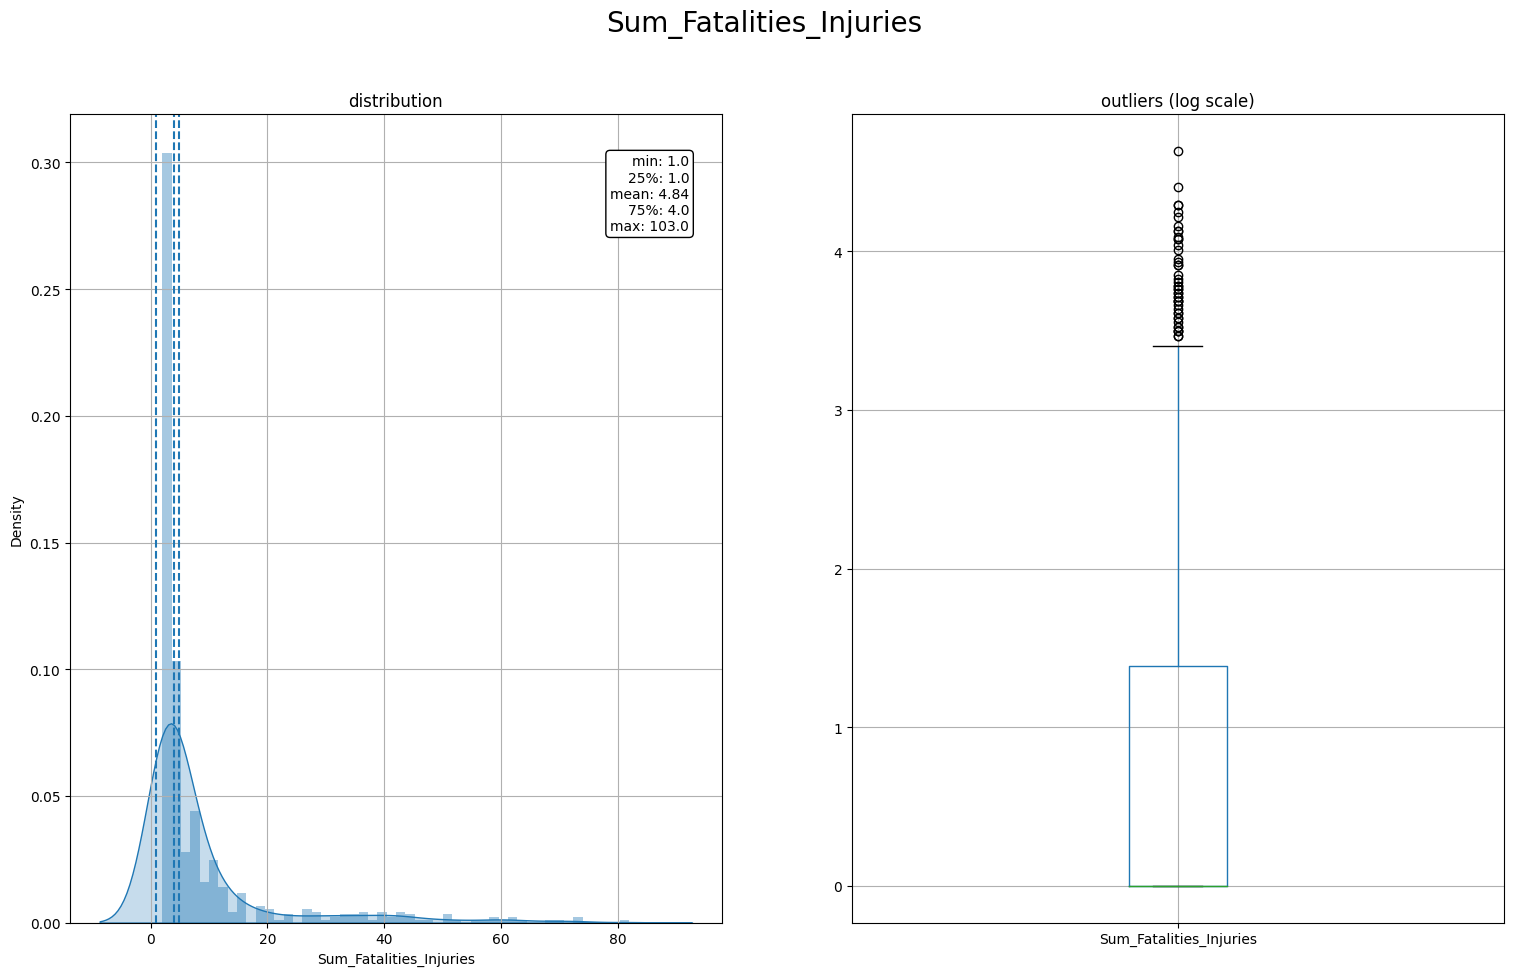

In [ ]:
#Looking at distribution of our label feature
x = "Sum_Fatalities_Injuries"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
fig.set_size_inches(18.5, 10.5)

### distribution
ax[0].title.set_text('distribution')
variable = df1[x].fillna(df1[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = df1[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_df1 = pd.DataFrame(df1[x])
tmp_df1[x] = np.log(df1[x])
tmp_df1.boxplot(column=x, ax=ax[1])
plt.show()

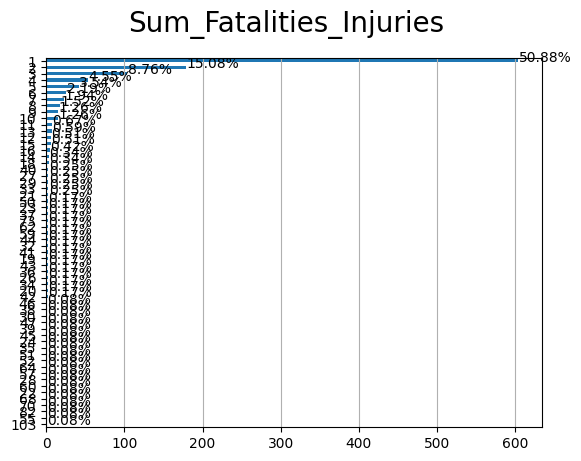

In [ ]:
ax = df1[x].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(x, fontsize=20)
plt.show()

<ipython-input-21-66782af2ebe6>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[df1[cat]==i][num], hist=False, label=i, ax=ax[0])
<ipython-input-21-66782af2ebe6>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[df1[cat]==i][num], hist=False, label=i, ax=ax[0])
/usr/l

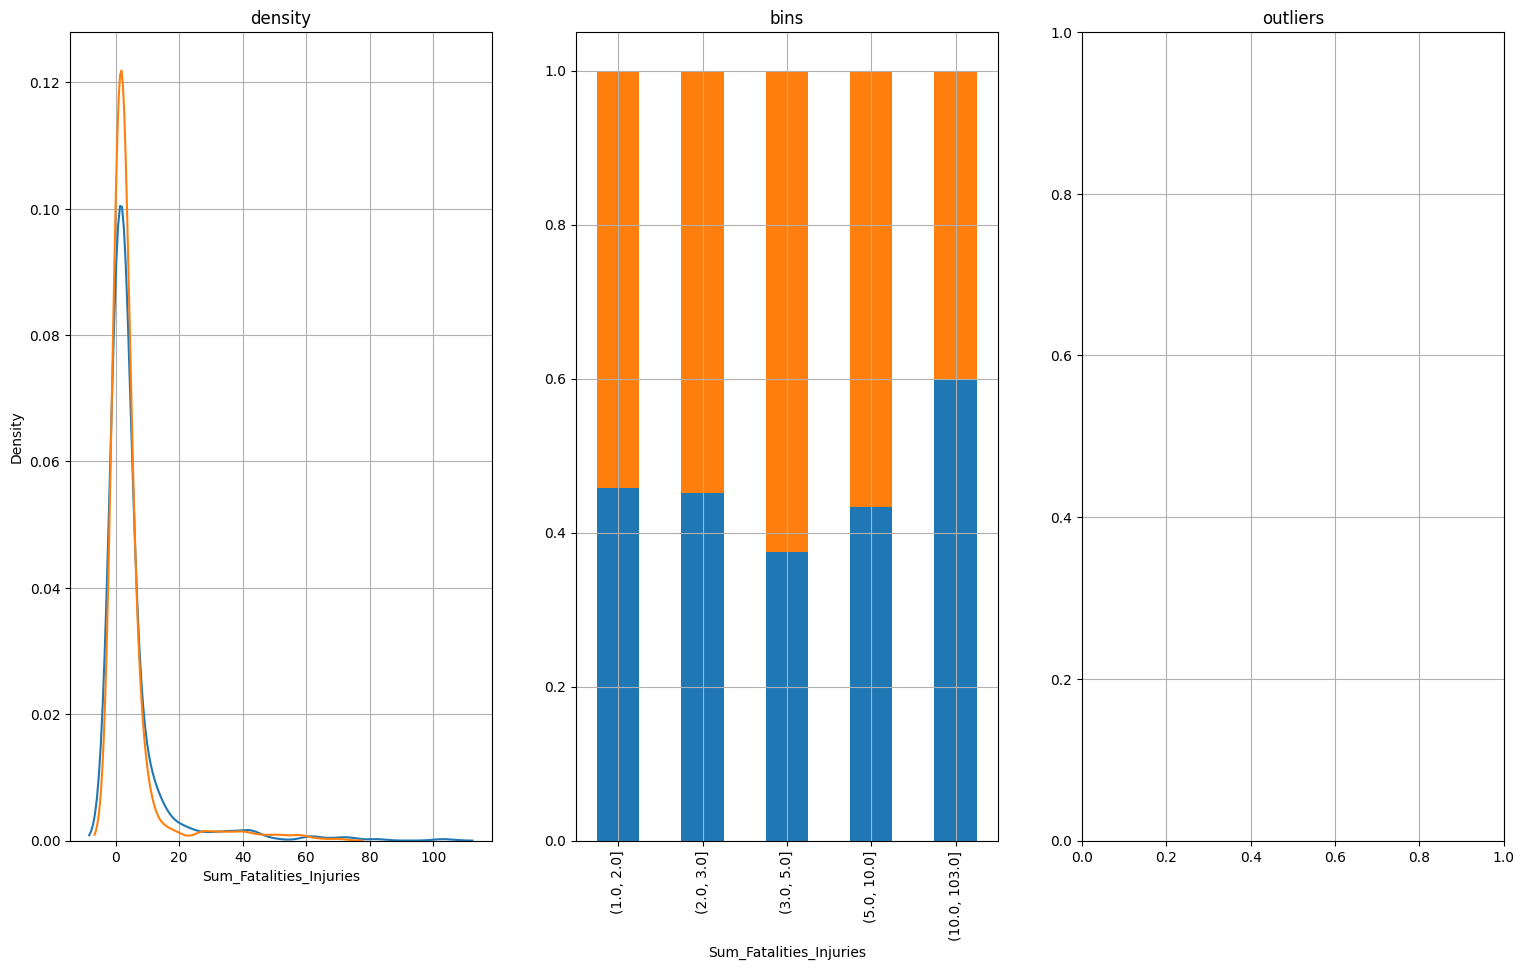

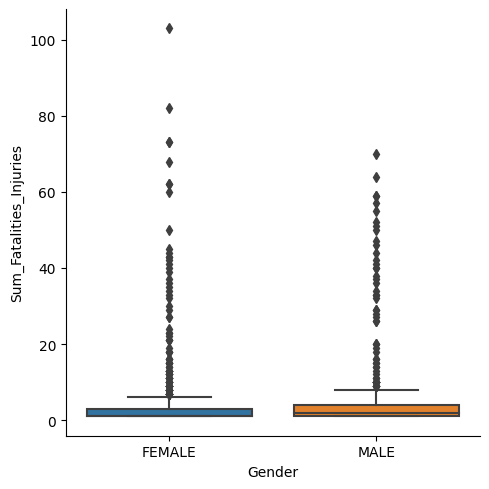

In [ ]:
#Causality between Gender and Sum of Injuries & Fatalities
cat, num = "Gender", "Sum_Fatalities_Injuries"
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False)
#fig.suptitle(x+"   vs   "+y, fontsize=20)
fig.set_size_inches(18.5, 10.5)
            
### distribution
ax[0].title.set_text('density')
for i in df1[cat].unique():
    sns.distplot(df1[df1[cat]==i][num], hist=False, label=i, ax=ax[0])
ax[0].grid(True)
### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(df1[num], q=np.linspace(0,1,11))
tmp = df1.groupby([cat, pd.cut(df1[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[df1[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=False, grid=True)
### boxplot   
ax[2].title.set_text('outliers')
sns.catplot(x=cat, y=num, data=df1, kind="box", ax=ax[2])
ax[2].grid(True)
plt.show()

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
cat, num = "Gender", "Sum_Fatalities_Injuries"
model = ols(num+' ~ '+cat, data=df1).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables are Non-Correlated (p-value: 0.252)


Gender does not appear to be correlated with our label target

**Data Preprocessing & Cleaning** 

In [ ]:
# column_group_2 = [['Primary Transportation - Motorist'], ['Experienced Driver'], ['Residential Speeding'], ['Automated Tickets'], ['Higher_Ed'], ['High_Income'], ['Single'], ['Driver_Pop'], ['Vaccine'], ['Impaired']]
# column_group_0 = ['Collision Report Year', 'Injury Severity', 'Injury Age Group', 'Traffic Control Name', 'Injury Mode']
# column_group_1 = ['Injury Gender']